# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:


The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:




1.   order_id: integer
2.   customer_id: integer
1.   restaurant_name: nominal
2.   cuisine_type: nominal
1.   cost_of_the_order: float, numeric
2.   day_of_the_week: nominal
1.   rating: nominal
2.   food_preparation_time: integer
1.   delivery_time: integer












### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in any column

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
min = np.min(df['food_preparation_time'])
max = np.max(df['food_preparation_time'])
mean = np.mean(df['food_preparation_time'])

In [ ]:
print('The minimum time for a order to be prepared once the order is placed: ', min)
print('The maximum time for a order to be prepared once the order is placed: ', max)
print('The average time for a order to be prepared once the order is placed: ', mean)

The minimum time for a order to be prepared once the order is placed:  20
The maximum time for a order to be prepared once the order is placed:  35
The average time for a order to be prepared once the order is placed:  27.371970495258168


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.order_id.nunique()

1898

There are 1898 orders identification numbers

In [ ]:
df.customer_id.nunique()

1200

On the other hand, there are only 1200 customer identification number. This means than a fraction of the customers order more than once.

In [ ]:
df.restaurant_name.nunique()

178

There are only 178 restaurants in this dataframe.

In [ ]:
df.cuisine_type.nunique()

14

There are 14 types of cuisine.

**Cuisine type**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

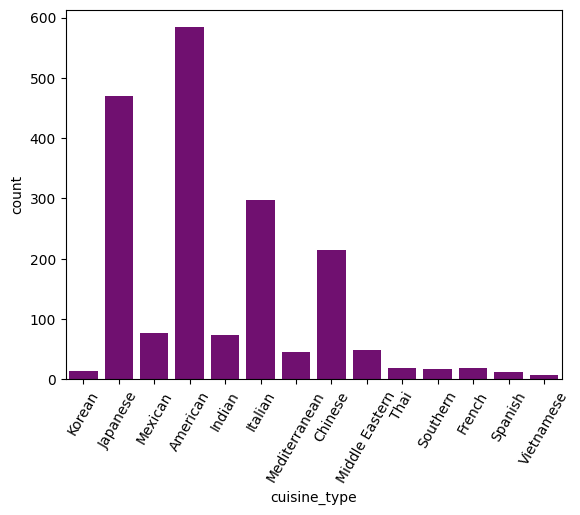

In [ ]:
# plt.figure(figsize = (20,7))
sns.countplot(data = df, x = df.cuisine_type,color='purple')
plt.xticks(rotation=60)

The cuisine type with more orders submitted is American

**Day of the week**

<Axes: xlabel='day_of_the_week', ylabel='Count'>

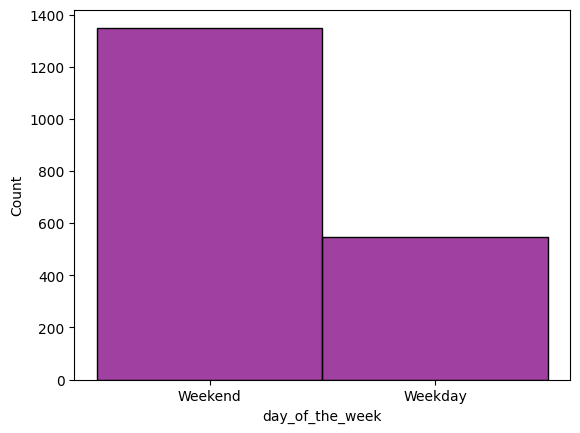

In [ ]:
sns.histplot(data=df,x=df.day_of_the_week,color='purple')

In [ ]:
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Weekends are the most popular days to order food by delivery.

**Food preparation time**

<Axes: xlabel='food_preparation_time'>

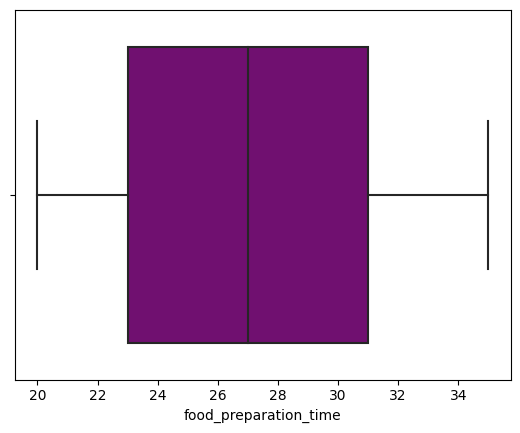

In [ ]:
sns.boxplot(data=df,x=df.food_preparation_time,color='purple')

<Axes: xlabel='food_preparation_time', ylabel='Count'>

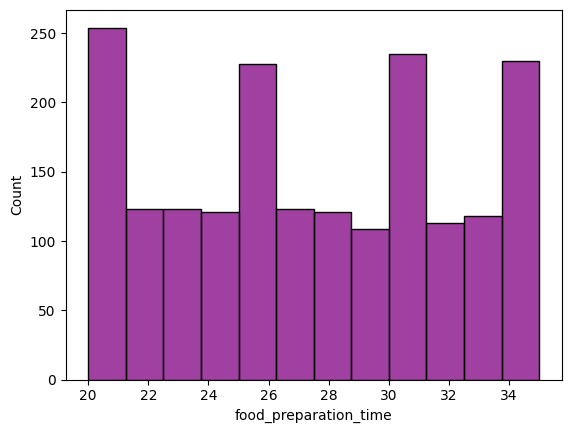

In [ ]:
sns.histplot(data=df,x=df.food_preparation_time,color='purple')

The food preparation time goes from 20 to 34 minutes with median of aprox 26 minutes.

**Cost of the order**

<Axes: xlabel='cost_of_the_order'>

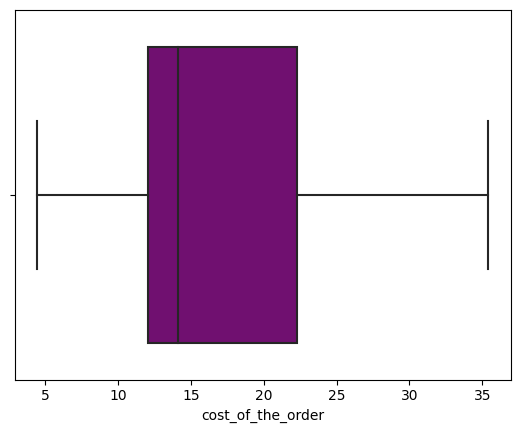

In [ ]:
sns.boxplot(data=df,x=df.cost_of_the_order,color='purple')

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

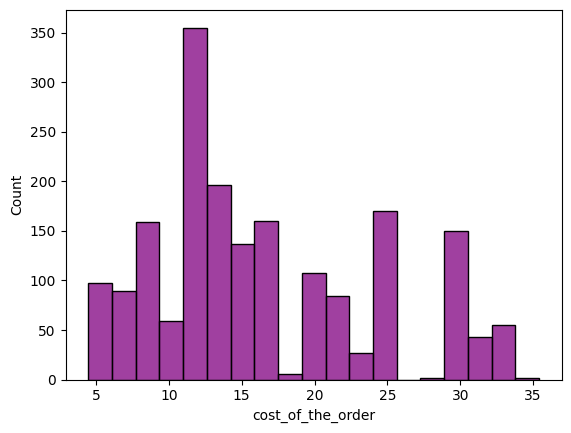

In [ ]:
sns.histplot(data=df,x=df.cost_of_the_order,color='purple')

Cost of orders goes from 5 to 25 dollars. Being most common cost between 10 to 15 dollars.

**Delivery time**

<Axes: xlabel='delivery_time'>

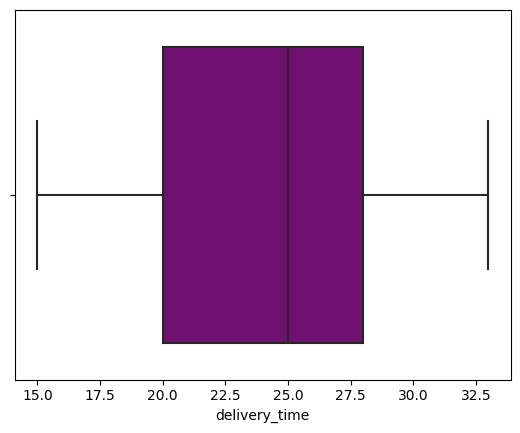

In [ ]:
sns.boxplot(data=df,x=df.delivery_time,color='purple')

<Axes: xlabel='delivery_time', ylabel='Count'>

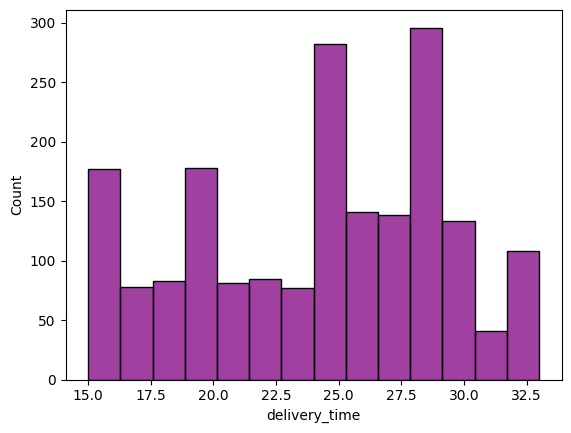

In [ ]:
sns.histplot(data=df,x=df.delivery_time,color='purple')

The waiting time varies from 15 minutes to 33 minutes.

**Rating**

<Axes: xlabel='rating', ylabel='count'>

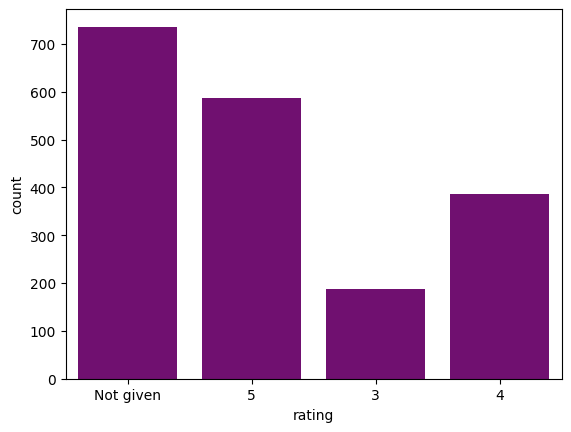

In [ ]:
sns.countplot(data=df,x=df.rating,color='purple')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
total_orders = df.cuisine_type.value_counts()
total_orders.nlargest(5)

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_weekend=df[df['day_of_the_week']=='Weekend']

In [ ]:
df_weekend.cuisine_type.value_counts().nlargest(1)

American    415
Name: cuisine_type, dtype: int64

The most popular cuisine type on weekends is American.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df_20 = df[df['cost_of_the_order']>20]

print('The total number of orders that costed more than 20 dollars is',df_20.cost_of_the_order.shape[0])

The total number of orders that costed more than 20 dollars is 555


In [ ]:
per = (df_20.cost_of_the_order.shape[0]/df.shape[0])*100
print('The percentage of orders that costed more than 20 dollars is',per)

The percentage of orders that costed more than 20 dollars is 29.24130663856691


Around 30% of the orders had a cost of 20 dollars or greater.

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_del = df.delivery_time.mean()
print('The mean of delivery time is ',mean_del)

The mean of delivery time is  24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df.customer_id.value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

The three customer id that will receive the bonification are



*   52832 with 13 orders
*   47440 with 10 orders
*   83287 with 9 orders






#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


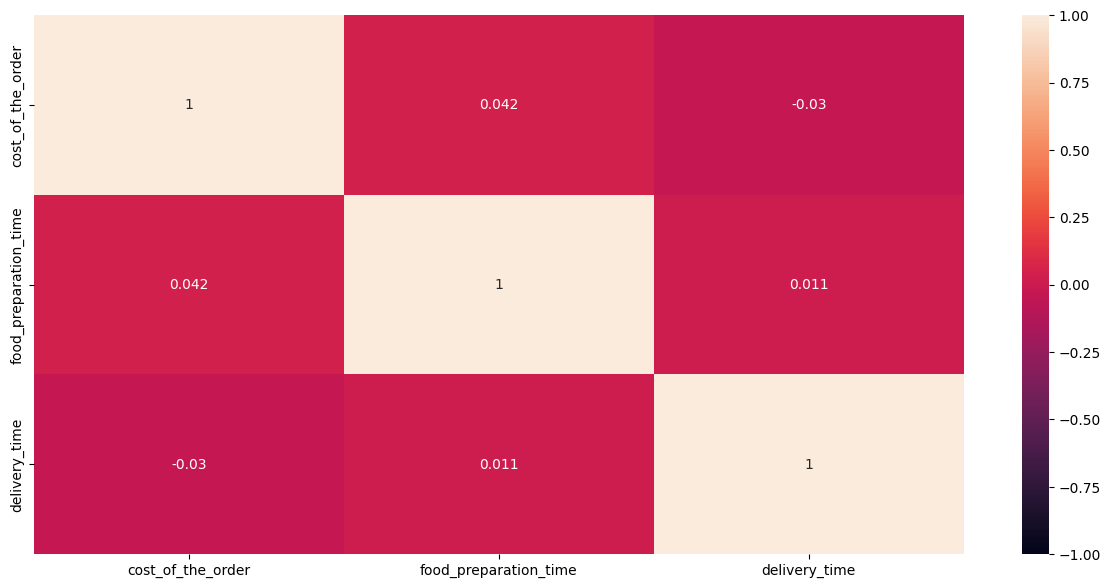

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Cost of the order vs cuisine**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

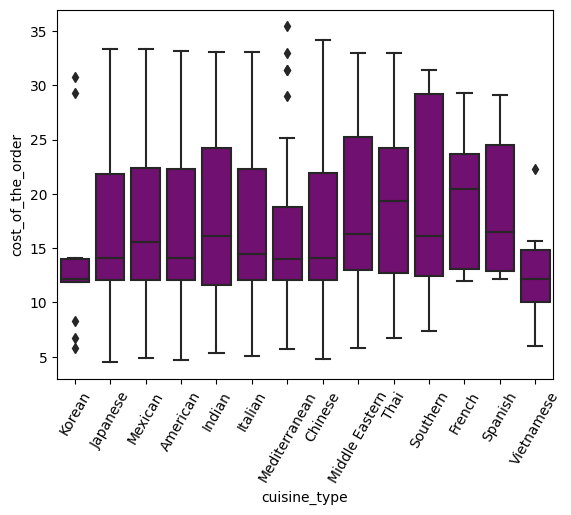

In [ ]:
sns.boxplot(data=df,y=df.cost_of_the_order,x=df.cuisine_type,color='purple')
plt.xticks(rotation=60)

**Food preparation vs cuisine**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

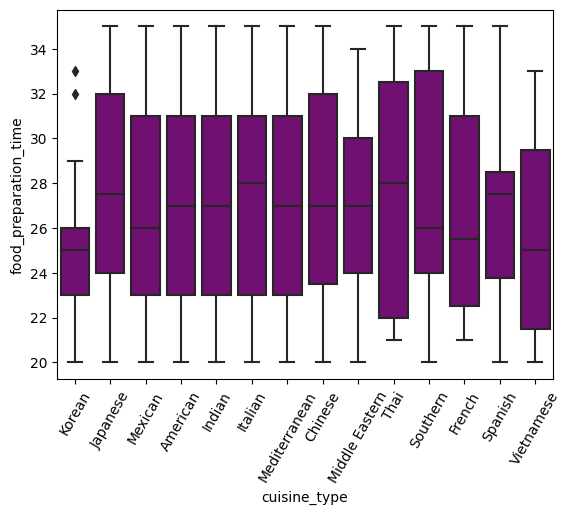

In [ ]:
sns.boxplot(data=df,y=df.food_preparation_time,x=df.cuisine_type,color='purple')
plt.xticks(rotation=60)

**Delivery time vs Day of the week**

(array([0, 1]), [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

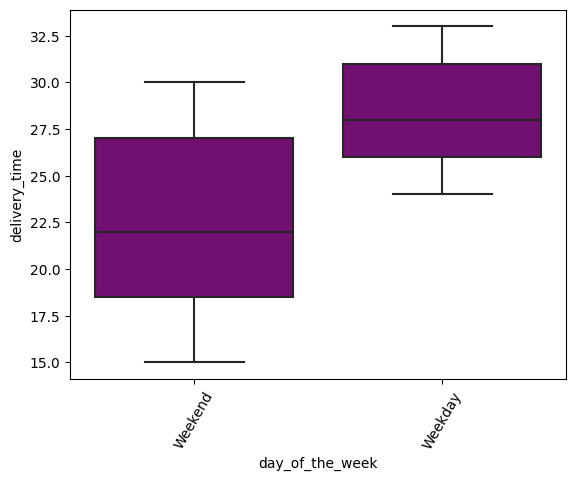

In [ ]:
sns.boxplot(data=df,y=df.delivery_time,x=df.day_of_the_week,color='purple')
plt.xticks(rotation=60)

**Cost of the order vs rating**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Not given'), Text(1, 0, '5'), Text(2, 0, '3'), Text(3, 0, '4')])

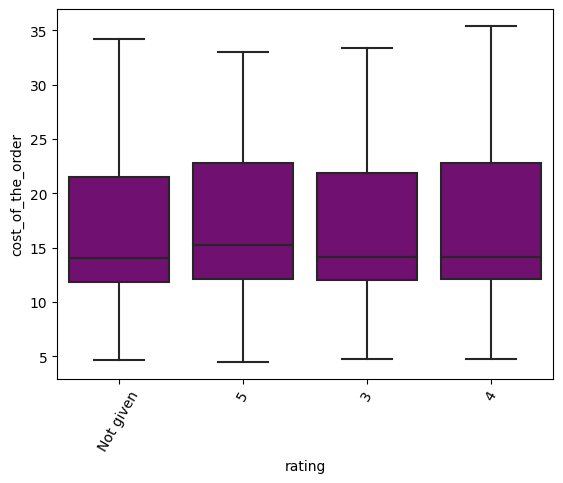

In [ ]:
sns.boxplot(data=df,y=df.cost_of_the_order,x=df.rating,color='purple')
plt.xticks(rotation=60)

**Food preparation vs rating**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Not given'), Text(1, 0, '5'), Text(2, 0, '3'), Text(3, 0, '4')])

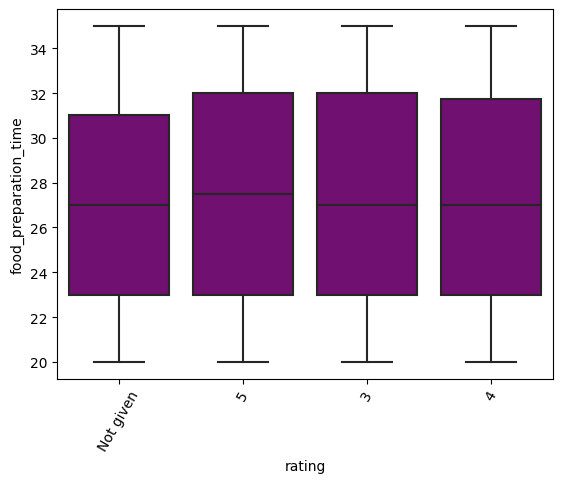

In [ ]:
sns.boxplot(data=df,y=df.food_preparation_time,x=df.rating,color='purple')
plt.xticks(rotation=60)

**Delivery time vs rating**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Not given'), Text(1, 0, '5'), Text(2, 0, '3'), Text(3, 0, '4')])

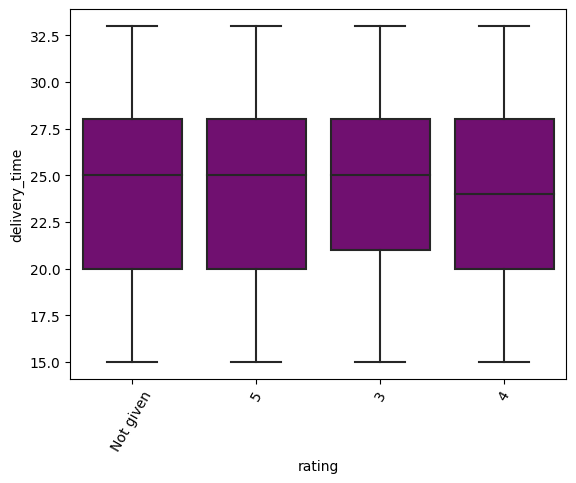

In [ ]:
sns.boxplot(data=df,y=df.delivery_time,x=df.rating,color='purple')
plt.xticks(rotation=60)

**Restaurants with higher profits**



In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()


restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

**Restaurants with lower profits**


In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = True).head()


restaurant_name
Hunan Manor                   5.72
Cipriani Le Specialita        5.92
Big Wong Restaurant _¤¾Ñ¼    5.92
Wa Jeal                       6.74
Market Table                  6.79
Name: cost_of_the_order, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rate = df[df['rating'] != 'Not given'].copy()

rate['rating'] = rate['rating'].astype('int')
df_count = rate.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
df_av = rate.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

In [ ]:
df_av

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


In [ ]:
df_av[df_av['rating']>4]

,restaurant_name,rating
0,'wichcraft,5.000000
1,Ravagh Persian Grill,5.000000
2,Chola Eclectic Indian Cuisine,5.000000
3,Chote Nawab,5.000000
4,Junoon,5.000000
...,...,...
105,Cafe Mogador,4.153846
106,ilili Restaurant,4.153846
107,Parm,4.128205
108,Rubirosa,4.125000


In [ ]:
rate_count = pd.merge(df_count, df_av, on='restaurant_name', how='inner')

In [ ]:
rate_count

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125
4,RedFarm Broadway,41,4.243902
...,...,...,...
151,Frank Restaurant,1,4.000000
152,Socarrat Paella Bar,1,5.000000
153,El Parador Cafe,1,5.000000
154,Lucky Strike,1,4.000000


In [ ]:
rate_count[rate_count['rating_x']>50]

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:


Only 4 of the total of restaurants fulfill the criteria.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def charge_order(x):
    if x > 5 and x < 20:
        return x*0.15
    elif x > 20:
        return x*0.25
    else:
        return x*0

In [ ]:
df['net_revenue'] = df['cost_of_the_order'].apply(charge_order)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
df_rev = df[df['cost_of_the_order']>20]

In [ ]:
df_rev.value_counts()

order_id  customer_id  restaurant_name                        cuisine_type    cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time  net_revenue
1476560   149508       Shake Shack                            American        22.26              Weekend          4          32                     17             5.5650         1
1477852   74412        da Umberto                             Italian         32.98              Weekend          Not given  30                     28             8.2450         1
1477846   52574        Blue Ribbon Sushi                      Japanese        24.25              Weekday          5          30                     26             6.0625         1
1477847   106478       Blue Ribbon Sushi                      Japanese        24.25              Weekday          4          22                     29             6.0625         1
1477848   276192       12 Chairs                              Middle Eastern  29.05              Weekday 

In [ ]:
rev = df_rev.net_revenue.sum()
print('The total revenue is', rev )

The total revenue is 3688.7275


#### Observations:


The total revenue is 3688.7275

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_delivery'] = df['food_preparation_time']+df['delivery_time']

In [ ]:
total_time = df[df['total_delivery']>60]

In [ ]:
percentage_time = (total_time.shape[0] / df.shape[0])*100

In [ ]:
print('The percetange of orders delivered after 60 minutes is', percentage_time,'%')

The percetange of orders delivered after 60 minutes is 10.537407797681771 %


#### Observations:


Around 10% of the orders were delivered after 60 minutes of the order was place.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
mean_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('The mean delivery time on weekends is',mean_weekends,'minutes')


The mean delivery time on weekends is 22.4700222057735 minutes


In [ ]:
mean_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

print('The mean delivery time on weekdays is',mean_weekdays,'minutes')

The mean delivery time on weekdays is 28.340036563071298 minutes


#### Observations:


The delivery time on weekdays is a greater than in weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There is an obvious high demand on delivery during weekends.
*   American is the most ordered food
*   Not all orders are rated. Actually most of the orders ARE NOT rated.
*   Ratings doesn't affects much to delivery time
*   But there might be a relation between food preparation time and cuisine type.
*   The delivery times tend to be short. Only a small fraction of the orders delay more than 60 minutes.
*   The company recieves a good revenue for each order.







### Recommendations:

*  Implement better timing of delivery during weekdays
*   Make more public a variation of fod types based on the delivery time and food preparation time
*   To reduce the percentage of food delivered 60 mimutes after order place, it is necessary to prioritize the delivery times during weekdays.


*   There is no conclusive information about ratings. To increase the participation of clients in ratings, a win-win strategy can be used. For example, for each order rated the client can participate to win 'points' or free stuff.
*   To increase the revenue of the company, more orders should be placed. A recommendation might be to make the client able to place more than one item or order from more than one restaurant without any extra charge. So, as the restaurants increase the number of orders, the company earns more revenue.





---